In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from imblearn.over_sampling import  SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings

In [79]:
data=pd.read_csv('LoanExport.csv',low_memory=False)
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [81]:
data.isna().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [82]:
for i in data.columns:
    print(i,len(data[i].unique()))

CreditScore 370
FirstPaymentDate 66
FirstTimeHomebuyer 3
MaturityDate 96
MSA 392
MIP 37
Units 5
Occupancy 3
OCLTV 102
DTI 66
OrigUPB 375
LTV 97
OrigInterestRate 254
Channel 4
PPM 3
ProductType 1
PropertyState 53
PropertyType 7
PostalCode 892
LoanSeqNum 291451
LoanPurpose 3
OrigLoanTerm 61
NumBorrowers 3
SellerName 21
ServicerName 20
EverDelinquent 2
MonthsDelinquent 174
MonthsInRepayment 212


In [83]:
dty=data.dtypes[data.dtypes=='object'].index.to_list()

In [84]:
for i in dty:
    print(i,len(data[i].unique()))

FirstTimeHomebuyer 3
MSA 392
Occupancy 3
Channel 4
PPM 3
ProductType 1
PropertyState 53
PropertyType 7
PostalCode 892
LoanSeqNum 291451
LoanPurpose 3
NumBorrowers 3
SellerName 21
ServicerName 20


In [85]:
data=data.drop(columns=['LoanSeqNum','ProductType'],axis=1)

In [86]:
dty.remove('SellerName')
dty.remove('LoanSeqNum')
dty.remove('ProductType')
encoders={}
for i in dty:
    encoders[i]=LabelEncoder()
    data[i]=encoders[i].fit_transform(data[i])

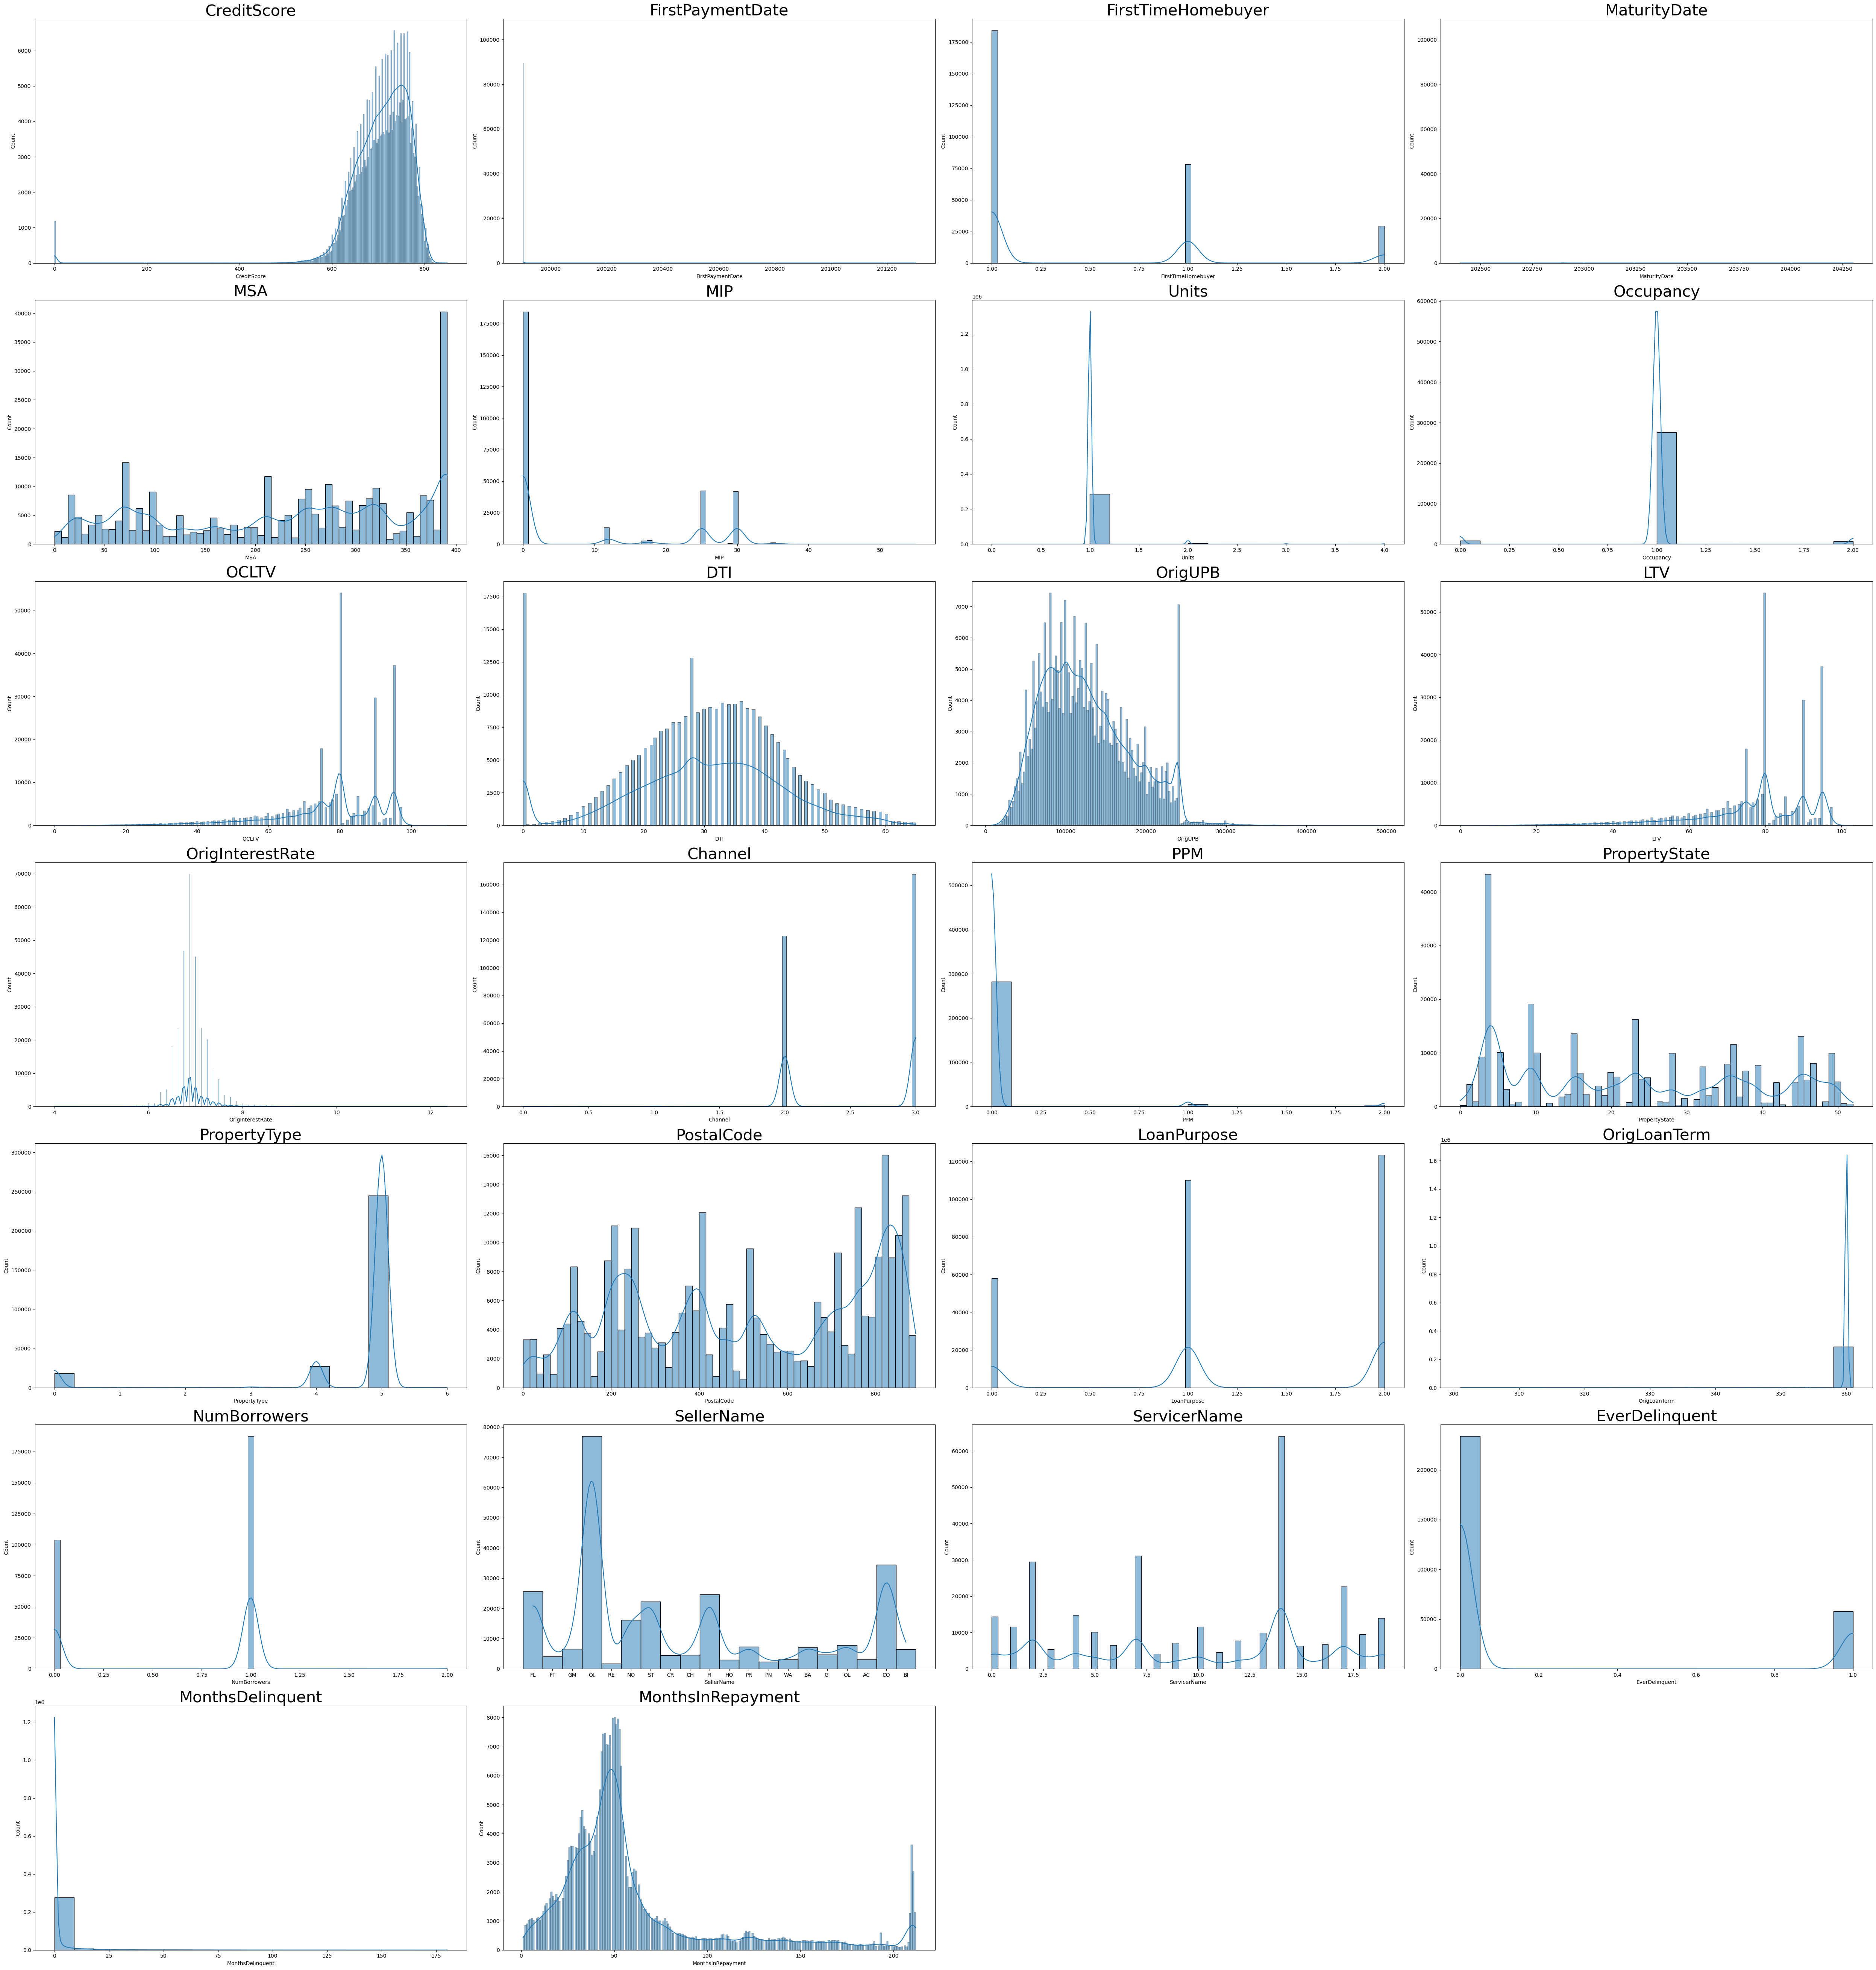

In [87]:
num_features = len(data.columns)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)

fig, axs = plt.subplots(num_rows, 4, figsize=(50, num_rows * 7.5))
count = 0
cols = data.columns.to_list()

for i in range(num_rows):
    for j in range(4):
        if count < num_features:
            sns.histplot(data[cols[count]], ax=axs[i, j], kde=True)
            axs[i, j].set_title(cols[count], fontsize=30)
            count += 1
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [88]:
if 'SellerName' in data.columns:
    data['SellerName'] = data['SellerName'].fillna('NaN')
    encoders['SellerName'] = LabelEncoder()
    data['SellerName'] = np.where(data['SellerName'] == 'NaN', np.nan, encoders['SellerName'].fit_transform(data['SellerName']))

In [89]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data['SellerName'] = imputer.fit_transform(data['SellerName'].values.reshape(-1, 1))
data['SellerName']=data['SellerName'].astype(int)

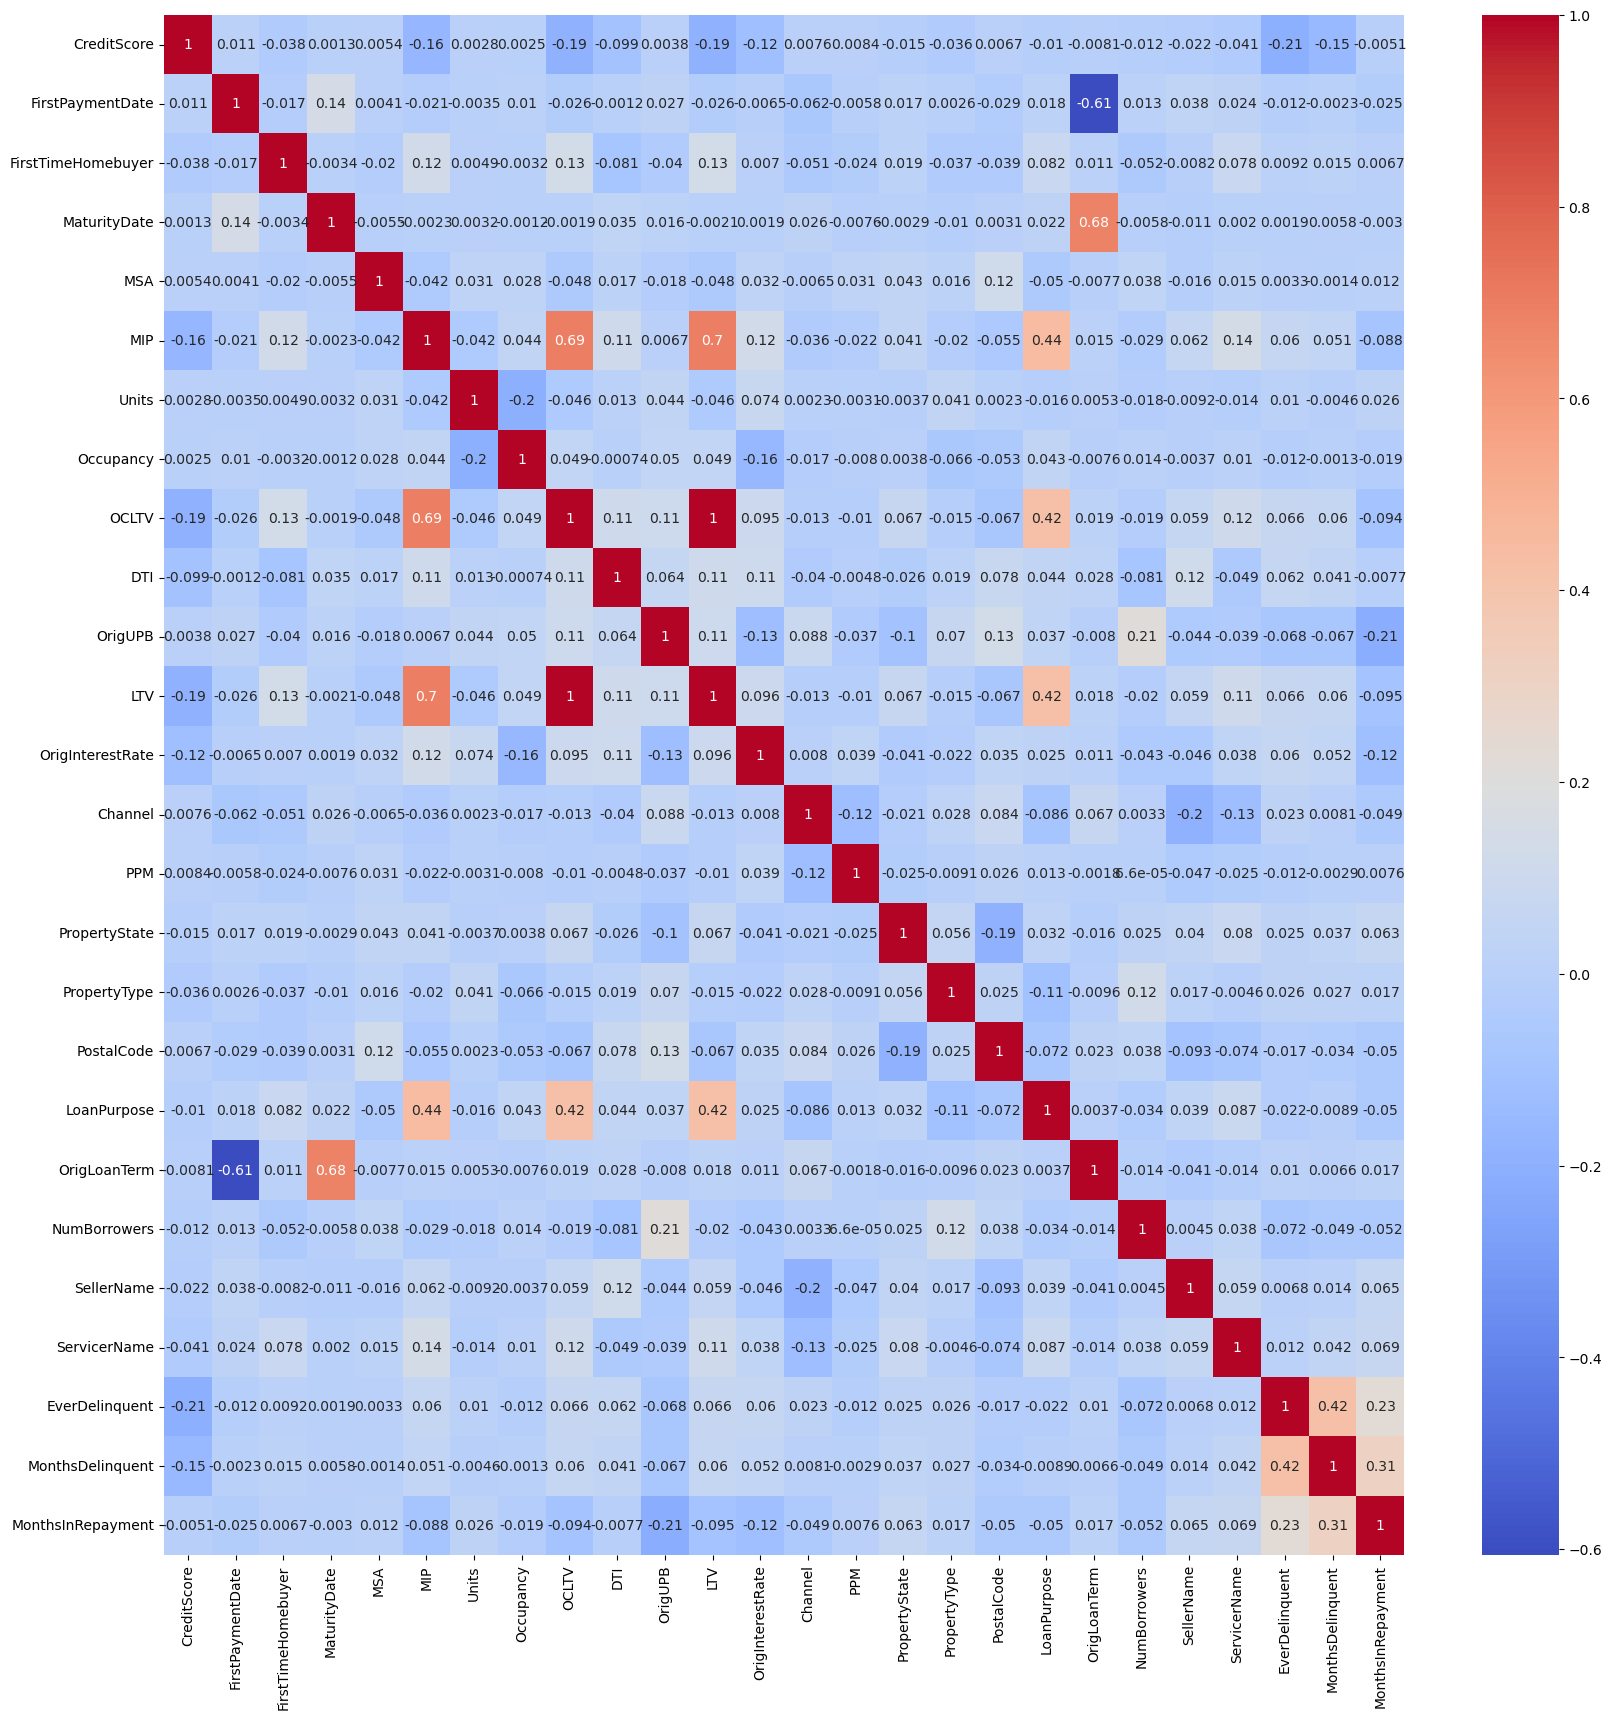

In [90]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,xticklabels=data.columns,yticklabels=data.columns,)
plt.show()

In [108]:
ps=data.corr()['EverDelinquent'].abs()
j=[]
for i in ps.index:
    if ps[i]>0.02:
        print(i,ps[i])
        j.append(i)

CreditScore 0.20720363936960792
MIP 0.05999319424423508
OCLTV 0.06552815743413283
DTI 0.06210911493375326
OrigUPB 0.06760525344438764
LTV 0.06573545366574456
OrigInterestRate 0.060418152002405065
Channel 0.02273568289440606
PropertyState 0.02543327563860582
PropertyType 0.0264423642668043
LoanPurpose 0.02169032335622182
NumBorrowers 0.07212037133448448
EverDelinquent 1.0
MonthsDelinquent 0.42004787546620725
MonthsInRepayment 0.23249683170888627


In [110]:
data=data[j]

In [132]:
X=data.drop(columns=['EverDelinquent'],axis=1)
y=data['EverDelinquent']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

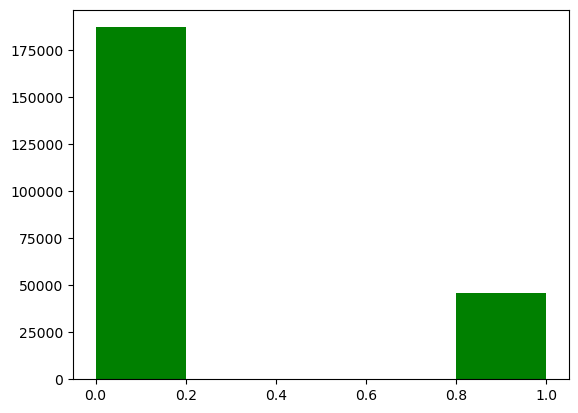

In [129]:
plt.hist(y_train,color='g',bins=5)
plt.show()

In [143]:
warnings.filterwarnings('ignore')
clf = LogisticRegression(solver= 'lbfgs', multi_class = 'multinomial').fit(x_train, y_train)
ypred = clf.predict(x_test)
yProba = clf.predict_proba(x_test)

In [144]:
print("Accuarcy of the Logistic Regression is :",np.round(clf.score(x_test, y_test),2))

Accuarcy of the Logistic Regression is : 0.87


In [145]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     46670
           1       0.88      0.42      0.57     11621

    accuracy                           0.87     58291
   macro avg       0.88      0.70      0.75     58291
weighted avg       0.87      0.87      0.85     58291



In [153]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

y_pred = svc_model.predict(x_test)

print("The Accuracy is : " , accuracy_score(y_test, y_pred)*100)
print("The Confusion matrix is :\n",confusion_matrix(y_test, y_pred))
print("The classification report is :\n",classification_report(y_test, y_pred))

The Accuracy is :  80.0638177420185
The Confusion matrix is :
 [[46670     0]
 [11621     0]]
The classification report is :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     46670
           1       0.00      0.00      0.00     11621

    accuracy                           0.80     58291
   macro avg       0.40      0.50      0.44     58291
weighted avg       0.64      0.80      0.71     58291

